In [160]:
import pandas as pd
from sklearn.model_selection import train_test_split,KFold
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
import spacy
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('D:/Data/news.csv')
df.head(5)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
df0=df.drop(index=0, columns='title')

In [4]:
df0.head(5)

,Unnamed: 0,text,label
1,10294,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,It's primary day in New York and front-runners...,REAL
5,6903,"\nI’m not an immigrant, but my grandparents ...",FAKE


In [5]:
df1=df0.drop(columns="Unnamed: 0",axis=0)

In [6]:
df1.head(5)

,text,label
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL
5,"\nI’m not an immigrant, but my grandparents ...",FAKE


In [7]:
df1.label.value_counts()

REAL    3171
FAKE    3163
Name: label, dtype: int64

# Balance Data

In [8]:
min_num=3163

In [9]:
df1_fake=df1[df1.label=='FAKE'].sample(min_num,random_state=2022)
df1_real=df1[df1.label=='REAL'].sample(min_num,random_state=2022)

In [10]:
df1_fake.shape

(3163, 2)

In [11]:
df1_real.shape

(3163, 2)

In [13]:
df2=pd.concat([df1_fake,df1_real],axis=0)

In [14]:
df2.label.value_counts()

FAKE    3163
REAL    3163
Name: label, dtype: int64

In [15]:
target={'FAKE':0,'REAL':1}

In [17]:
df2['label_num']=df2.label.map(target)

In [19]:
df2.sample(5)

,text,label,label_num
2539,Former Secretary of State and retired four-sta...,REAL,1
1468,BREAKING: White House Abandons TPP & TTIP Nov ...,FAKE,0
5127,Who has Trump appointed to his cabinet so far?...,REAL,1
2606,Donald Trump publicly raised questions about H...,REAL,1
4039,Russia unveiled a weapon capable of reaching U...,FAKE,0


In [20]:
X_train,X_test,y_train,y_test=train_test_split(df2.text,df2.label_num,random_state=2022,stratify=df2.label_num,test_size=0.2)

In [22]:
X_train.shape

(5060,)

In [23]:
y_train.shape

(5060,)

In [24]:
X_test.shape

(1266,)

In [25]:
y_test.shape

(1266,)

- Attempt 1 

# Creat Pipeline different different algorithm

In [125]:
clf=Pipeline([
    ('Count_vectorizer',CountVectorizer()),
    ('knn',(KNeighborsClassifier(n_neighbors=10,metric ='euclidean')))
])

In [126]:
clf.fit(X_train,y_train)

Pipeline(steps=[('Count_vectorizer', CountVectorizer()),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=10))])

In [127]:
y_predict=clf.predict(X_test)

In [129]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       622
           1       0.80      0.79      0.80       644

    accuracy                           0.79      1266
   macro avg       0.79      0.79      0.79      1266
weighted avg       0.79      0.79      0.79      1266



In [130]:
clf.score(X_test,y_test)

0.7938388625592417

.Attempt#2

In [131]:
clf1=Pipeline([
    ('Count_vectorizer',CountVectorizer(ngram_range=(1, 3))),
    ('knn',(KNeighborsClassifier(n_neighbors=10,metric='cosine')))
])

In [132]:
clf1.fit(X_train,y_train)

Pipeline(steps=[('Count_vectorizer', CountVectorizer(ngram_range=(1, 3))),
                ('knn', KNeighborsClassifier(metric='cosine', n_neighbors=10))])

In [133]:
y_predi=clf1.predict(X_test)

In [134]:
print(classification_report(y_predi,y_test))

              precision    recall  f1-score   support

           0       0.70      0.91      0.79       487
           1       0.93      0.75      0.83       779

    accuracy                           0.81      1266
   macro avg       0.81      0.83      0.81      1266
weighted avg       0.84      0.81      0.82      1266



In [135]:
clf1.score(X_test,y_test)

0.8135860979462876

Attempt#3

In [136]:
clf2=Pipeline([
    ('Count_vectorizer',CountVectorizer(ngram_range=(3, 3))),
    ('random_forest',(RandomForestClassifier()))
])

In [137]:
clf2.fit(X_train,y_train)

Pipeline(steps=[('Count_vectorizer', CountVectorizer(ngram_range=(3, 3))),
                ('random_forest', RandomForestClassifier())])

In [138]:
y_pre=clf2.predict(X_test)

In [139]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.71      0.98      0.82       633
           1       0.96      0.59      0.74       633

    accuracy                           0.79      1266
   macro avg       0.84      0.79      0.78      1266
weighted avg       0.84      0.79      0.78      1266



In [140]:
clf2.score(X_test,y_test)

0.7859399684044234

In [146]:
clf3=Pipeline([
    ('Count_vectorizer',CountVectorizer(ngram_range=(1,2))),
    ('navie_bayes',(MultinomialNB(alpha=0.75)))
])

In [147]:
clf3.fit(X_train,y_train)

Pipeline(steps=[('Count_vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('navie_bayes', MultinomialNB(alpha=0.75))])

In [148]:
y_pr=clf3.predict(X_test)

In [149]:
print(classification_report(y_pr,y_test))

              precision    recall  f1-score   support

           0       0.84      0.98      0.90       542
           1       0.98      0.86      0.92       724

    accuracy                           0.91      1266
   macro avg       0.91      0.92      0.91      1266
weighted avg       0.92      0.91      0.91      1266



In [150]:
clf3.score(X_test,y_test)

0.9107424960505529

In [99]:
clf4=Pipeline([
    ('Count_vectorizer',CountVectorizer(ngram_range=(2,2))),
    ('navie_bayes',(MultinomialNB(alpha=0.75))
])

In [100]:
clf4.fit(X_train,y_train)

Pipeline(steps=[('Count_vectorizer', CountVectorizer(ngram_range=(2, 2))),
                ('navie_bayes', MultinomialNB(alpha=0.75))])

In [101]:
y_pr2=clf.predict(X_test)

In [102]:
print(classification_report(y_pr2,y_test))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       679
           1       0.75      0.81      0.78       587

    accuracy                           0.79      1266
   macro avg       0.79      0.79      0.79      1266
weighted avg       0.79      0.79      0.79      1266



In [103]:
clf4.score(X_test,y_test)

0.9044233807266983

# Apply Preprocess step and predict

In [105]:
df2.head(5)

,text,label,label_num
5222,"in: War Propaganda , World News If it’s not Is...",FAKE,0
6052,"140230 Views November 12, 2016 BROADCAST King ...",FAKE,0
967,Research could ‘potentially serve as a curativ...,FAKE,0
5458,\nNo wonder they’re so confident!\nDominion Vo...,FAKE,0
2963,Yahoo News \nA 38-year-old Oklahoma man who ha...,FAKE,0


In [106]:
nlp=spacy.load('en_core_web_sm')

In [109]:
def preprocess(text):
    doc=nlp(text)
    
    filtered_toke=[]
    
    for token in doc:
        if token.is_punct or token.is_stop:
            continue
        filtered_toke.append(token.lemma_)
    return " ".join(filtered_toke)
   

In [111]:
preprocess('can i go to Karachi and Shikarpur')

'Karachi Shikarpur'

In [112]:
df2['preprocessed_txt']=df2['text'].apply(preprocess)

In [113]:
df2

,text,label,label_num,preprocessed_txt
5222,"in: War Propaganda , World News If it’s not Is...",FAKE,0,War Propaganda World News Islamophobia Russoph...
6052,"140230 Views November 12, 2016 BROADCAST King ...",FAKE,0,140230 view November 12 2016 BROADCAST King Wo...
967,Research could ‘potentially serve as a curativ...,FAKE,0,research potentially serve curative approach p...
5458,\nNo wonder they’re so confident!\nDominion Vo...,FAKE,0,\n wonder confident \n Dominion Voting Systems...
2963,Yahoo News \nA 38-year-old Oklahoma man who ha...,FAKE,0,Yahoo News \n 38 year old Oklahoma man evade p...
...,...,...,...,...
3628,Some are insisting on a “better deal” than the...,REAL,1,insist well deal framework nuclear agreement r...
5641,President Obama is expected to formally ask Co...,REAL,1,President Obama expect formally ask Congress a...
5659,After months of looking like bit players in th...,REAL,1,month look like bit player republican presiden...
281,They tease terrorists. The prophet Muhammad cr...,REAL,1,tease terrorist prophet Muhammad cry devout mu...


In [151]:
X_train,X_test,y_train,y_test=train_test_split(
df2.preprocessed_txt,df2.label_num,test_size=0.2,random_state=2022,stratify=df2.label_num)

In [152]:
X_train.shape

(5060,)

In [153]:
y_train.shape

(5060,)

In [155]:
clf5=Pipeline([
    ('Count_vector',(CountVectorizer(ngram_range=(3,3)))),
    ('Random_forest',(RandomForestClassifier()))
])


clf5.fit(X_train,y_train)

y_predict1=clf5.predict(X_test)
print(classification_report(y_predict1,y_test))

              precision    recall  f1-score   support

           0       0.98      0.71      0.82       874
           1       0.60      0.96      0.74       392

    accuracy                           0.79      1266
   macro avg       0.79      0.84      0.78      1266
weighted avg       0.86      0.79      0.80      1266



In [158]:
clf5.score(X_test,y_test)

0.7875197472353871

In [159]:
clf5=Pipeline([
    ('Count_vector',(CountVectorizer(ngram_range=(1,2)))),
    ('Random_forest',(MultinomialNB()))
])


clf5.fit(X_train,y_train)

y_predict1=clf5.predict(X_test)
print(classification_report(y_predict1,y_test))

              precision    recall  f1-score   support

           0       0.82      0.98      0.90       530
           1       0.99      0.85      0.91       736

    accuracy                           0.90      1266
   macro avg       0.90      0.92      0.90      1266
weighted avg       0.92      0.90      0.91      1266



# Print heatmap for beast score algrithm 

Text(95.72222222222221, 0.5, 'Truth')

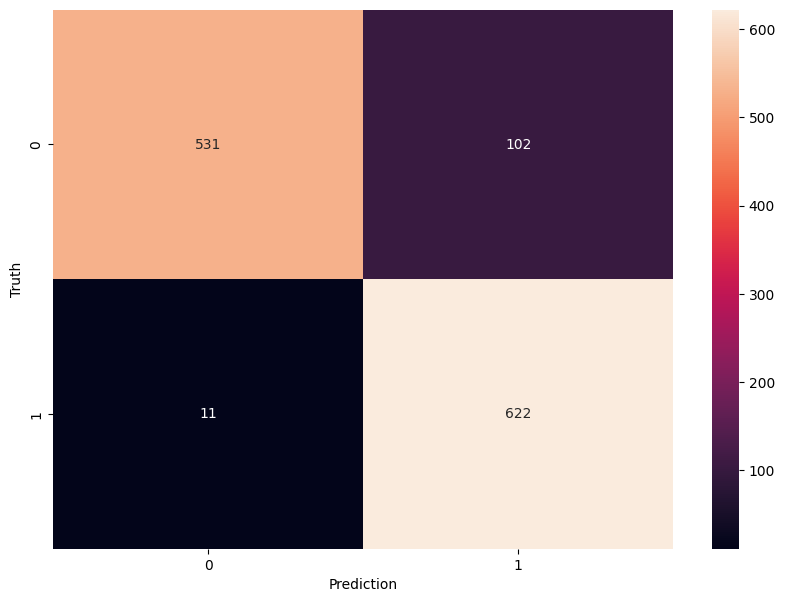

In [161]:
cm = confusion_matrix(y_test, y_pr)
cm


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')